Parkinson's Electrophysiological Signal Dataset (PESD)

This notebook was AI-generated using dandi-notebook-gen and has not been fully verified, and that they should be cautious when interpreting the code or results.

This notebook provides an introduction to the Parkinson's Electrophysiological Signal Dataset (PESD) (Dandiset 001333) and demonstrates how to access and visualize sample data from NWB files.

Dataset Description: The dataset contains electrophysiological signals from both healthy and parkinsonian subjects. We generated two types of samples from each group. The parkinsonian signals show a relatively high power density at the beta frequency (13 to 30 Hz). Thus, the beta oscillations (13 to 30 Hz) in the subthalamic nucleus (STN) are typically used as the pathological biomarkers for PD symptoms. Each sample includes two types of signals: Beta Average Rectified Voltage (ARV) and Local Field Potential (LFP) from the Subthalamic Nucleus (STN). The ARV signals are in the frequency domain and LFP signals are in the time domain.

Beta ARV Signal: The controller beta values are determined by calculating the Average Rectified Value (ARV) of the beta band. This is achieved by fully rectifying the filtered LFP signal using a fourth-order Chebyshev band-pass filter with an 8 Hz bandwidth, centered around the peak of the LFP power spectrum. Local Field Potential (LFP) - STN: Local Field Potentials are derived from the synchronized activity of neuron populations between the cortex, STN, and thalamus.

More details can be found in our article named, "Preliminary Results of Neuromorphic Controller Design and a Parkinson's Disease Dataset Building for Closed-Loop Deep Brain Stimulation", available at https://arxiv.org/abs/2407.17756

Key Metadata:
*   Contributor: Biswas, Ananna
*   Date Created: 2025-02-08T10:15:43.847350+00:00
*   Variable Measured: ElectricalSeries, LFP, ElectrodeGroup, ProcessingModule
*   Measurement Technique: analytical technique, signal filtering technique, surgical technique, multi electrode extracellular electrophysiology recording technique

First, install necessary packages as follows:
```bash
pip install dandi h5py matplotlib
```

In [1]:
from dandi.dandiapi import DandiAPIClient
client = DandiAPIClient()
dandiset = client.get_dandiset("001333")
assets = list(dandiset.get_assets())

The above code block uses the DANDI API to list all of the assets in the Dandiset.  This is a good place to start to get an inventory of the contents of the Dandiset.  For example, the code block below will print out the paths of the first 5 assets in the Dandiset.

In [2]:
for i, asset in enumerate(assets[:5]):
    print(f"Asset {i+1}: {asset.path}")

Asset 1: sub-healthy-simulated-data/sub-healthy-simulated-data_ses-001_ecephys.nwb
Asset 2: sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-218_ecephys.nwb
Asset 3: sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-279_ecephys.nwb
Asset 4: sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-423_ecephys.nwb
Asset 5: sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb


Next, we select an NWB file from the Dandiset that contains data that would be nice to visualize. In this case, we will select `sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-218_ecephys.nwb`.

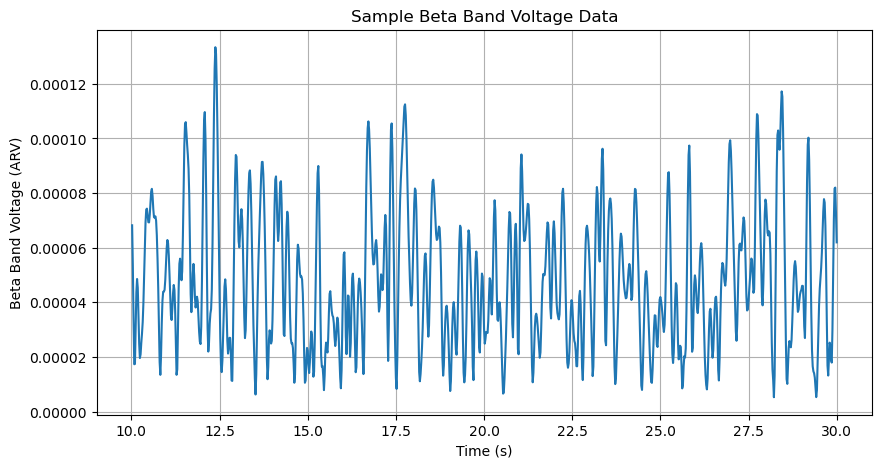

In [3]:
import os
import tempfile
import h5py
import urllib.request
import matplotlib.pyplot as plt
import numpy as np

nwb_file_path = "sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-218_ecephys.nwb"
asset = next(asset for asset in assets if asset.path == nwb_file_path)

# Download the NWB file to a temporary location
download_url = asset.download_url

try:
    with tempfile.NamedTemporaryFile(delete=False, suffix=".nwb") as tmpfile:
        urllib.request.urlretrieve(download_url, tmpfile.name)
        temp_nwb_path = tmpfile.name

    with h5py.File(temp_nwb_path, 'r') as nwbfile:
        # Get the data and timestamps
        data = nwbfile['processing']['ecephys']['LFP']['Beta_Band_Voltage']['data']
        timestamps = nwbfile['processing']['ecephys']['LFP']['Beta_Band_Voltage']['timestamps']

        # Extract a small subset of the data (e.g., first 1000 samples)
        subset_size = 1000
        data_subset = data[:subset_size]
        timestamps_subset = timestamps[:subset_size]

        # Plot the data subset
        plt.figure(figsize=(10, 5))  # Adjust figure size for better visualization
        plt.plot(timestamps_subset, data_subset)
        plt.xlabel("Time (s)")
        plt.ylabel("Beta Band Voltage (ARV)")
        plt.title("Sample Beta Band Voltage Data")
        plt.grid(True)

        # Save the plot to a file
        plot_filename = "beta_band_voltage.png"
        plt.savefig(plot_filename)
        plt.show() # display the plot

except Exception as e:
    print(f"Error loading NWB file: {e}")
finally:
    # Clean up the temporary file
    if 'temp_nwb_path' in locals():
        os.remove(temp_nwb_path)

The above code block downloads the NWB file, extracts the Beta Band Voltage data and timestamps, and plots a subset of the data. The plot shows the Beta Band Voltage fluctuating rapidly over time, ranging approximately from 0 to 0.00012. There are some noticeable peaks with seemingly semi-regular intervals, possibly indicating some underlying pattern.

Concluding remarks: This notebook provides a starting point for exploring the Parkinson's Electrophysiological Signal Dataset. It demonstrates how to access the Dandiset, list assets, load an NWB file, extract data, and visualize the data.